# Fluxes
Download data from
https://github.com/BlackHolePerturbationToolkit/CircularOrbitSelfForceData

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from few.utils.utility import CubicSpline

def Omega_phi_eqpro(r, a):
        return(1./(np.sqrt(r*r*r) + a))

def EdotPN(r,a):
    y = np.power(Omega_phi_eqpro(r,a),2./3.)
    res = 6.4*np.power(y,5) #- 23.752380952380953*np.power(y,6) + 1.6*(50.26548245743669 - 11.*a)*np.power(y,6.5) + (-31.54215167548501 + 13.2*np.power(a,2))*np.power(y,7) + 0.009523809523809525*(-25732.785425553997 - 2646.*a - 504.*np.power(a,3))*np.power(y,7.5) + \
   #(-649.6614141423464 + 260.32427983539094*a + 163.36281798666926*np.power(a,2) - 32.13333333333333*np.power(a,3))*np.power(y,8.5) + np.power(y,8)*(740.6829867239124 - 217.8170906488923*a + 7.758730158730159*np.power(a,2) - 52.17523809523809*np.log(y)) #+\
       #np.power(y,9)*(-748.828100625135 - 515.5802343491364*a + 69.31499118165785*np.power(a,2) + 5.2*np.power(a,4) + 3.2*np.sqrt(1. - 1.*np.power(a,2)) + 41.6*np.power(a,2)*np.sqrt(1. - 1.*np.power(a,2)) + 19.2*np.power(a,4)*np.sqrt(1. - 1.*np.power(a,2)) + 12.8*(a + 3.*np.power(a,3)) + 168.77786848072563*np.log(y))

    return res

def isco_pro(a):
      Z1 = 1. + (np.power(1. + a, 1./3.) + np.power(1. - a, 1./3.)) * np.power((1. + a)*(1. - a), 1./3.)
      Z2 = np.sqrt(3.*a*a + Z1*Z1)

      return(3. + Z2 - np.sqrt((3. - Z1)*(3. + Z1 + 2.*Z2)))


def isco_kerr(a):
    isc = 3 + np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2)) - \
   np.sqrt((2 - np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)))*\
     (4 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)) + \
       2*np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2))))
    return isc


In [26]:
radius = np.loadtxt('./flux_circ_tensor.dat')[:,0]
a_array= np.loadtxt('./flux_circ_tensor.dat')[:,1]
u_array =np.round( np.log( radius - isco_pro(a_array) +3.9),decimals=8)
flux_data = np.loadtxt('./flux_circ_tensor.dat')[:,2]
flux_scalar = np.loadtxt('./flux_circ_scalar.dat')[:,2]

In [19]:
print(len(np.unique(u_array)))
np.unique(u_array)

86


array([1.37 , 1.395, 1.42 , 1.445, 1.47 , 1.495, 1.52 , 1.545, 1.57 ,
       1.595, 1.62 , 1.645, 1.67 , 1.695, 1.72 , 1.745, 1.77 , 1.795,
       1.82 , 1.845, 1.87 , 1.895, 1.92 , 1.945, 1.97 , 1.995, 2.02 ,
       2.045, 2.07 , 2.095, 2.12 , 2.145, 2.17 , 2.195, 2.22 , 2.245,
       2.27 , 2.295, 2.32 , 2.345, 2.37 , 2.395, 2.42 , 2.445, 2.47 ,
       2.495, 2.52 , 2.545, 2.57 , 2.595, 2.62 , 2.645, 2.67 , 2.695,
       2.72 , 2.745, 2.77 , 2.795, 2.82 , 2.845, 2.87 , 2.895, 2.92 ,
       2.945, 2.97 , 2.995, 3.02 , 3.045, 3.07 , 3.095, 3.12 , 3.145,
       3.17 , 3.195, 3.22 , 3.245, 3.27 , 3.295, 3.32 , 3.345, 3.37 ,
       3.395, 3.42 , 3.445, 3.47 , 3.495])

In [13]:
uniq_a = np.unique(a_array)
print(len(uniq_a))

99


-5.001292588925393 0.1387510203707418
-4.952398175104886 0.08565904714429422
-4.804056386469604 0.2876409418459734


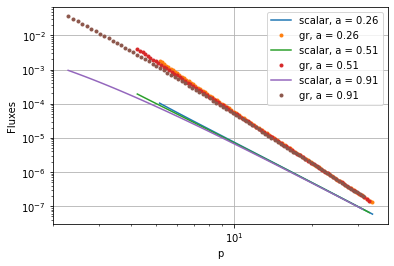

In [20]:
ind = len(np.unique(u_array))
plt.figure()
for i in [25,50, 90]:#[0, 25, 50, 75, 90]:
    rr = radius[ind*i:ind*(i+1)]
    fl = flux_scalar[ind*i:ind*(i+1)]
    fl_gr = flux_data[ind*i:ind*(i+1)]
    plt.loglog(rr, fl, '-', label=f'scalar, a = {uniq_a[i]}')
    plt.loglog(rr, fl_gr, '.', label=f'gr, a = {uniq_a[i]}')
    slope = np.gradient(fl_gr,rr)*rr/fl_gr
    nn = np.median(slope)
    print(nn, np.std(slope))
plt.ylabel('Fluxes')
plt.xlabel('p')
plt.legend()
plt.grid()

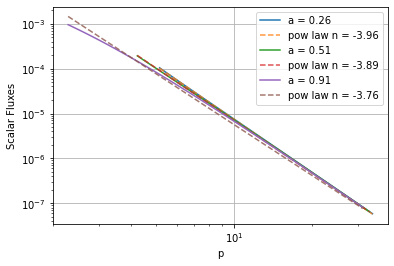

In [21]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')


plt.figure()
for i in [25,50, 90]:#[0, 25, 50, 75, 90]:
    rr = radius[ind*i:ind*(i+1)]
    fl = flux_scalar[ind*i:ind*(i+1)]
    plt.loglog(rr, fl, '-', label=f'a = {uniq_a[i]}')
    # find slope
    slope = np.gradient(fl,rr)*rr/fl
    nn = np.median(slope)
    pow_law = fl[15]*(rr/rr[15])**nn
    plt.loglog(rr, pow_law, '--', label=f'pow law n = {nn:.3}', alpha=0.8)
    # print(slope)
plt.ylabel('Scalar Fluxes')
plt.xlabel('p')
plt.legend()
plt.grid()
# plt.savefig('slope_fitting')

(0.0, 0.1)

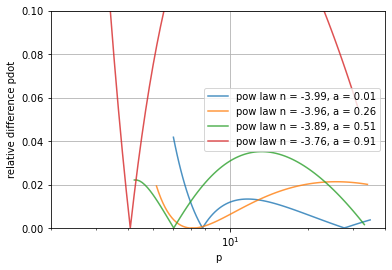

In [22]:

plt.figure()
for i in [0, 25,50, 90]:#[0, 25, 50, 75, 90]:
    rr = radius[ind*i:ind*(i+1)]
    fl = flux_scalar[ind*i:ind*(i+1)]
    # find slope
    slope = np.gradient(fl,rr)*rr/fl
    nn = np.median(slope)
    pow_law = fl[15]*(rr/rr[15])**nn
    plt.semilogx(rr, np.abs((fl - pow_law)/fl), '-', label=f'pow law n = {nn:.3}, a = {uniq_a[i]}', alpha=0.8)

plt.ylabel('relative difference pdot')
plt.xlabel('p')
plt.legend()
plt.grid()
plt.ylim([0.0, 0.1])
# plt.savefig('slope_fitting_ral_diff')

In [24]:
u_array[0]-u_array[ind]

0.0

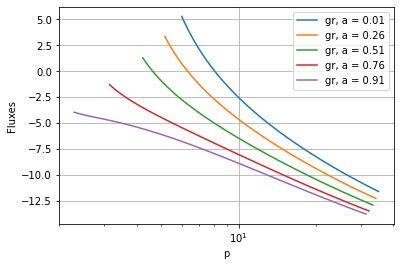

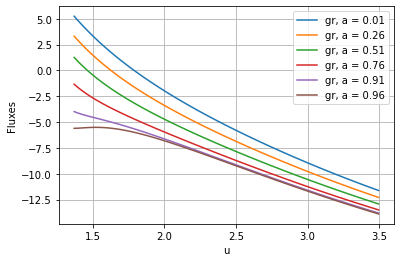

In [37]:

plt.figure()
for i in [0, 25, 50, 75, 90]:
    rr = radius[ind*i:ind*(i+1)]
    fl_gr = flux_data[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.semilogx(rr, (fl_gr-EdotPN(rr, uniq_a[i] ))/np.power(y, 6), '-', label=f'gr, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes')
plt.xlabel('p')
plt.legend()
plt.grid()

plt.figure()
for i in [0, 25, 50, 75, 90, 95]:
    rr = radius[ind*i:ind*(i+1)]
    fl_gr = flux_data[ind*i:ind*(i+1)]
    y = np.power(Omega_phi_eqpro(rr,uniq_a[i]),2./3.)
    
    plt.plot(u_array[ind*i:ind*(i+1)] , (fl_gr-EdotPN(rr, uniq_a[i] ))/np.power(y, 6), '-', label=f'gr, a = {uniq_a[i]}')
    # plt.loglog(rr, EdotPN(rr, uniq_a[i] ), '--', label=f'gr, a = {uniq_a[i]}')
plt.ylabel('Fluxes')
plt.xlabel('u')
plt.legend()
plt.grid()

## Total Flux

In [7]:
with open('./FluxesEdot_scalar_tensor_1PNnormalized.dat', 'w') as f:
    for j in range(len(a_array)):
        # PN normalization
        # y = np.power(Omega_phi_eqpro(radius[j], a_array[j]),2./3.)
        # fact = np.power(y, 6)
        # Ed = EdotPN(radius[j], a_array[j] )
        # flux_gr_norm = (flux_data[j] - Ed)/fact
        f.write( str(flux_scalar[j])+'\t' +str(flux_data[j])+'\t' +  str(u_array[j] )+'\t' + str(a_array[j]) )
        f.write('\n')
    f.close()